In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

### Tensorflow MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
api_test = test_images

11493376/11490434 [==============================] - 6s 1us/step


In [3]:
#Split and format dataset
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

### Simple Sequential Model

In [4]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()
model.fit(train_images, train_labels, epochs=10)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 431us/sample - loss: 1.1714 - accuracy: 0.6570
Epoch 2/10
1000/1000 [==============================] - 0s 145us/sample - loss: 0.4235 - accuracy: 0.8850
Epoch 3/10
1000/1000 [==============================] - 0s 158us/sample - loss: 0.2869 - accuracy: 0.9210
Epoch 4/10
1000/1000 [==============================] - 0s 166us/sample - loss: 0.2110 - accuracy: 0.9590
Epoch 5/10
1000/1000 [==============================] - 0s 177us/sample - loss: 0.1599 - accuracy: 0.9660
Epoch 6/10
1000/1000 [==============================] - 0s 190us/sample - loss: 0.1124 - accuracy: 0.9800
Epoch 7/10
1000/1000 [==============================] - 0s 170us/sample - loss: 0.0879 - accuracy: 0.9900
Epoch 8/10
1000/1000 [==============================] - 0s 152us/sample - loss: 0.0669 - accuracy: 0.9930
Epoch 9/10
1000/1000 [==============================] - 0s 153us/sample - loss: 0.0458 - accuracy: 0.9990
Epoch 10/10
1000/1000 [=

### Evaluation

In [5]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1000/1000 - 0s - loss: 0.4094 - accuracy: 0.8690
Restored model, accuracy: 86.90%


### Save Model 

In [6]:
model.save('mnist_model.h5')

In [7]:
# new_model = tf.keras.models.load_model('my_model.h5')
# new_model.summary()

# API Request

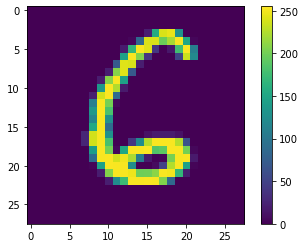

In [8]:
#image to test against api
img_to_predict = api_test[98]


plt.figure()
plt.imshow(img_to_predict)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
import requests

#Find container flask ap container ip
#docker inspect -f '{{range .NetworkSettings.Networks}}{{.IPAddress}}{{end}}' interesting_ptolemy
flask_app_ip = '0.0.0.0'

url = 'http://'+flask_app_ip+':5000/api/'
params = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
img = img_to_predict
data = {'params': params, 'arr': img.tolist()}
response = requests.post(url, json=data)

In [11]:
response.text

'6'